<div style="text-align: center; color: red;">
        <h1>Amna Muzaffar</h1>
        <h3>04072013003</h3>
        <h3>Assignment 3</h3>
    </div>

# Problem 1


# Transportation Problem

In [1]:
import sys
sys.setrecursionlimit(10000)
def printSolution(solution):
    totalCost, history = solution
    print('totalCost: {}'.format(totalCost))
    for item in history:
        print(item)
class TransportationProblem(object):
    def __init__(self, N):
        # N = number of blocks
        self.N = N

    def startState(self):
        return 1

    def isEnd(self, state):
        return state == self.N

    def succAndCost(self, state):
        # return list of (action, newState, cost) triples
        result = []
        if state + 1 <= self.N:
            result.append(('walk', state + 1, 1))
        if state + 3 <= self.N:
            result.append(('run', state + 3, 1.5))
        if 2 * state <= self.N:
            result.append(('tram', 2 * state, 2))
        return result




<p><b>Here we have transportation problem. Walk costs 1, run costs 1.5 anfd tram costs 2.

# Depth First Search

In [2]:
def dfs(problem):
    def recurse(state, history, totalCost):
        if problem.isEnd(state):
            return totalCost, history

        for action, newState, cost in problem.succAndCost(state):
            result = recurse(newState, history + [(action, newState, cost)], totalCost + cost)
            if result:
                return result

    return recurse(problem.startState(), history=[], totalCost=0)

# Example usage:
problem_dfs = TransportationProblem(N=20)
dfs_solution = dfs(problem_dfs)
print('DFS Solution:')
printSolution(dfs_solution)

DFS Solution:
totalCost: 19
('walk', 2, 1)
('walk', 3, 1)
('walk', 4, 1)
('walk', 5, 1)
('walk', 6, 1)
('walk', 7, 1)
('walk', 8, 1)
('walk', 9, 1)
('walk', 10, 1)
('walk', 11, 1)
('walk', 12, 1)
('walk', 13, 1)
('walk', 14, 1)
('walk', 15, 1)
('walk', 16, 1)
('walk', 17, 1)
('walk', 18, 1)
('walk', 19, 1)
('walk', 20, 1)


<p><b>As In Depth First Search, we know that we assume cost to be 0 at each edge so we traverse tree only once as we get same cost at each path and get the soultion so here we are just returning 1 soltution and not searching for best solution.</b></p>

# Breath First Search

In [3]:
from collections import deque
def bfs(problem):
    queue = deque([(problem.startState(), [])])

    while queue:
        state, history = queue.popleft()

        if problem.isEnd(state):
            totalCost = sum(cost for _, _, cost in history)
            return (totalCost, history)

        for action, newState, cost in problem.succAndCost(state):
            queue.append((newState, history + [(action, newState, cost)]))

# Example usage:
problem_bfs = TransportationProblem(N=20)
bfs_solution = bfs(problem_bfs)
print('BFS Solution:')
printSolution(bfs_solution)

BFS Solution:
totalCost: 6.5
('walk', 2, 1)
('run', 5, 1.5)
('tram', 10, 2)
('tram', 20, 2)


<p><b>As In Breath First Search, we know that we assume cost to be constant greater than 0 at each edge and we traverse tree level by level.</b></p>

# Dynamic Programming

In [4]:
def dynamicProgramming(problem):
    cache = {} # state -> futureCost(state), action, newState, cost
    def futureCost(state):
        # Base case
        if problem.isEnd(state):
            return 0
        if state in cache: # Exponential savings
            return cache[state][0]
        # Actually doing work
        result = min((cost+futureCost(newState), action, newState, cost) \
                for action, newState, cost in problem.succAndCost(state))
        cache[state] = result
        return result[0]

    state = problem.startState()
    totalCost = futureCost(state)

    # Recover history
    history = []
    while not problem.isEnd(state):
        _, action, newState, cost = cache[state]
        history.append((action, newState, cost))
        state = newState

    return (futureCost(problem.startState()), history)

# Example usage:
problem_dp = TransportationProblem(N=20)
dp_solution = dynamicProgramming(problem_dp)
print('Dynamic Programming Solution:')
printSolution(dp_solution)

Dynamic Programming Solution:
totalCost: 6.5
('run', 4, 1.5)
('run', 7, 1.5)
('run', 10, 1.5)
('tram', 20, 2)


<p><b>As In Dynamic Programming cost can be any so we take costs that are defined in Tranportaton problem.</b></p>

# Uniform Cost Search

In [5]:
import heapq
def uniformCostSearch(problem):
    priority_queue = [(0, problem.startState(), [])]

    while priority_queue:
        totalCost, state, history = heapq.heappop(priority_queue)

        if problem.isEnd(state):
            return (totalCost, history)

        for action, newState, cost in problem.succAndCost(state):
            heapq.heappush(priority_queue, (totalCost + cost, newState, history + [(action, newState, cost)]))

# Example usage:
problem_ucs = TransportationProblem(N=20)
ucs_solution = uniformCostSearch(problem_ucs)
print('Uniform Cost Search Solution:')
printSolution(ucs_solution)

Uniform Cost Search Solution:
totalCost: 6.5
('run', 4, 1.5)
('run', 7, 1.5)
('run', 10, 1.5)
('tram', 20, 2)


<p><b>As In UCS, cost greater than equal to 0 so we are here also taking costs that are used in Tranportation problem.</b></p>

# Problem 2

# Markaz of Islamabad

In [6]:
#  Markaz locations in Islamabad
markaz_locations = {
    'I-8 Markaz': (33.6677, 73.0752),
    'I-11 Markaz': (33.6492, 73.0226),
    'I-10 Markaz': (33.6488,73.0407),
    'F-7 Markaz': (33.7211, 73.0571),
    'F-8 Markaz': (33.7116, 73.0398),
    'E-11 Markaz': (33.6843, 72.9885),
    'F-6 Markaz':(33.7299,73.0763),
    'I-9 Markaz':(33.6567,73.0558),
    'F-8 Markaz':(33.7116,73.0398),
    'I-12 Markaz':(33.6242, 73.0077), 
    'G-9 Markaz':(33.6877,73.0339),
    'G-10 Markaz':(33.6757,73.0162),
    'G-6 Markaz':(33.7167,73.0855),
    'G-7 Markaz':(33.7049,73.0693),
    'G-8 Markaz':(33.6967,73.0501),
    'G-13 Markaz':(33.6509,72.9634),
    'G-15 Markaz':(33.6322,72.9228),
    'G-15 Markaz':(33.6323, 72.9228), 
    'F-11 Markaz':(33.6843, 72.9885),
}


# Heuristic Function

In [7]:
from math import radians, sin, cos, sqrt, atan2
import networkx as nx
from itertools import combinations
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert coordinates from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Calculate distance
    distance = round(R * c,4)
    return distance




<p><b>The haversine function computes the rounded haversine distance, a heuristic estimate of the actual distance, between two geographical coordinates on Earth, facilitating efficient pathfinding in algorithms like A* search.</b></p>

#  Graph Making

In [8]:
# Build the weighted graph
G = nx.Graph()

# Add nodes to the graph with their positions
for markaz, location in markaz_locations.items():
    G.add_node(markaz, pos=location)
    
# Add edges to the graph with weights (distances)
for (source_markaz, source_location), (dest_markaz, dest_location) in combinations(markaz_locations.items(), 2):
    distance_km = haversine(source_location[0], source_location[1], dest_location[0], dest_location[1])
    G.add_edge(source_markaz, dest_markaz, weight=distance_km)

# Displaying Graph with Edges showing Distances(costs)

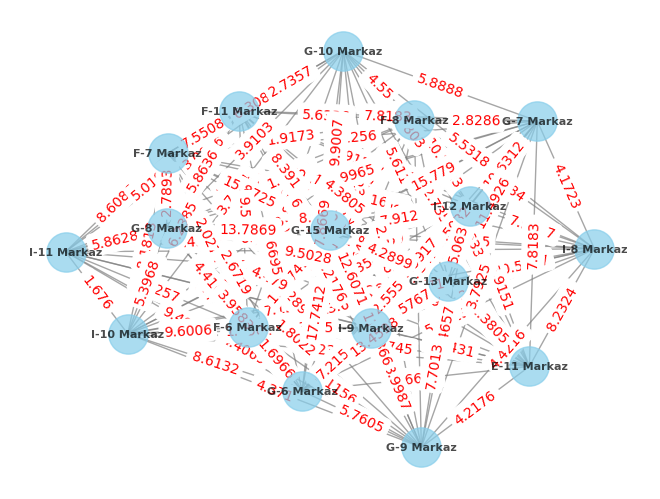

In [9]:
import matplotlib.pyplot as plt

# Choose a different layout algorithm (e.g., 'spring_layout', 'spectral_layout', etc.)
pos = nx.spring_layout(G)

# Draw the graph with adjusted parameters
nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', font_weight='bold', node_size=800, node_color='skyblue', edge_color='gray', linewidths=1, alpha=0.7)

# Display edge labels (distances)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
#
# Show the plot
plt.show()


# Randomly Choosing Source and Destination

In [10]:
import random

sectors = ['I', 'F', 'E']
source_sector = random.choice(sectors)
destination_sector = random.choice([s for s in sectors if s != source_sector])

source_markaz = random.choice([markaz for markaz in markaz_locations.keys() if source_sector in markaz])
destination_markaz = random.choice([markaz for markaz in markaz_locations.keys() if destination_sector in markaz])
print("Source Markaz is:",source_markaz)
print("Destination Markaz is:",destination_markaz)

Source Markaz is: I-11 Markaz
Destination Markaz is: F-11 Markaz


<p><b>Here we are randomly choosing source and destination markaz.</p>

# Uniform Cost Search(UCS)

In [11]:
import heapq

def uniform_cost_search(graph, start, goal):
    # Initialize the priority queue (frontier) with the starting node and cost
    frontier = [(0, start)]
    heapq.heapify(frontier)

    # Set to keep track of visited nodes
    visited = set()

    # Variable to count the number of nodes visited
    nodes_visited = 0

    # Main loop
    while frontier:
        # Pop the node with the lowest cost from the priority queue
        cost, current_node = heapq.heappop(frontier)

        # Check if the goal node is reached
        if current_node == goal:
            # Reconstruct the path from goal to start
            path = [current_node]
            while current_node != start:
                current_node, _ = graph.nodes[current_node]['parent']
                path.append(current_node)
            return list(reversed(path)), cost, nodes_visited

        # Skip if the node has already been visited
        if current_node in visited:
            continue

        # Mark the current node as visited
        visited.add(current_node)

        # Increment the count of visited nodes
        nodes_visited += 1

        # Explore neighbors of the current node
        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                # Calculate the tentative cost from start to the neighbor
                tentative_cost = graph[current_node][neighbor]['weight']
                heapq.heappush(frontier, (cost + tentative_cost, neighbor))

                # Update the parent of the neighbor for path reconstruction
                graph.nodes[neighbor]['parent'] = (current_node, tentative_cost)

    # If no path is found, return an empty list, infinite cost, and the number of nodes visited
    return [], float('inf'), nodes_visited


# A* Search

In [12]:
import heapq

def astar_search(graph, start, goal, heuristic):
    # Initialize the priority queue (frontier) with the starting node and cost
    frontier = [(0, start)]
    heapq.heapify(frontier)

    # Set to keep track of visited nodes
    visited = set()

    # Variable to count the number of nodes visited
    nodes_visited = 0

    # Main loop
    while frontier:
        # Pop the node with the lowest total cost from the priority queue
        cost, current_node = heapq.heappop(frontier)

        # Check if the goal node is reached
        if current_node == goal:
            # Reconstruct the path from goal to start
            path = [current_node]
            while current_node != start:
                current_node = graph.nodes[current_node]['parent']
                path.append(current_node)
            return list(reversed(path)), cost, nodes_visited

        # Skip if the node has already been visited
        if current_node in visited:
            continue

        # Mark the current node as visited
        visited.add(current_node)

        # Increment the count of visited nodes
        nodes_visited += 1

        # Explore neighbors of the current node
        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                # Calculate the tentative cost from start to the neighbor
                tentative_cost = graph[current_node][neighbor]['weight'] + heuristic(
                    *graph.nodes[current_node]['pos'], *graph.nodes[neighbor]['pos']
                )

                # Push the neighbor and its tentative cost to the priority queue
                heapq.heappush(frontier, (tentative_cost, neighbor))

                # Update the parent of the neighbor for path reconstruction
                graph.nodes[neighbor]['parent'] = current_node

    # If no path is found, return an empty list, infinite cost, and the number of nodes visited
    return [], float('inf'), nodes_visited

<p><b>Here in A* we implemented future cost by adding heuristic function to improve its performance</b></p>

# Running Both Alogrithms

In [13]:
# Run Uniform Cost Search
ucs_path, ucs_distance, ucs_nodes_visited = uniform_cost_search(G, source_markaz, destination_markaz)

print("\nUniform Cost Search Path:", ucs_path)
print("Uniform Cost Search Distance:", ucs_distance)
print("Number of Nodes Visited:", ucs_nodes_visited)

# Run A* Search
astar_path, astar_distance, astar_nodes_visited = astar_search(G, source_markaz, destination_markaz, heuristic=haversine)

# Print Results
print("\nA* Search Path:", astar_path)
print("A* Search Distance:", astar_distance)
print("Number of Nodes Visited:", astar_nodes_visited)



Uniform Cost Search Path: ['I-11 Markaz', 'I-10 Markaz', 'G-10 Markaz', 'I-12 Markaz', 'I-9 Markaz', 'G-9 Markaz', 'E-11 Markaz', 'F-11 Markaz']
Uniform Cost Search Distance: 5.0192
Number of Nodes Visited: 7

A* Search Path: ['I-11 Markaz', 'I-10 Markaz', 'I-9 Markaz', 'I-8 Markaz', 'G-10 Markaz', 'G-9 Markaz', 'G-8 Markaz', 'F-8 Markaz', 'F-7 Markaz', 'G-7 Markaz', 'G-6 Markaz', 'F-6 Markaz', 'E-11 Markaz', 'F-11 Markaz']
A* Search Distance: 0.0
Number of Nodes Visited: 13


# Visualization

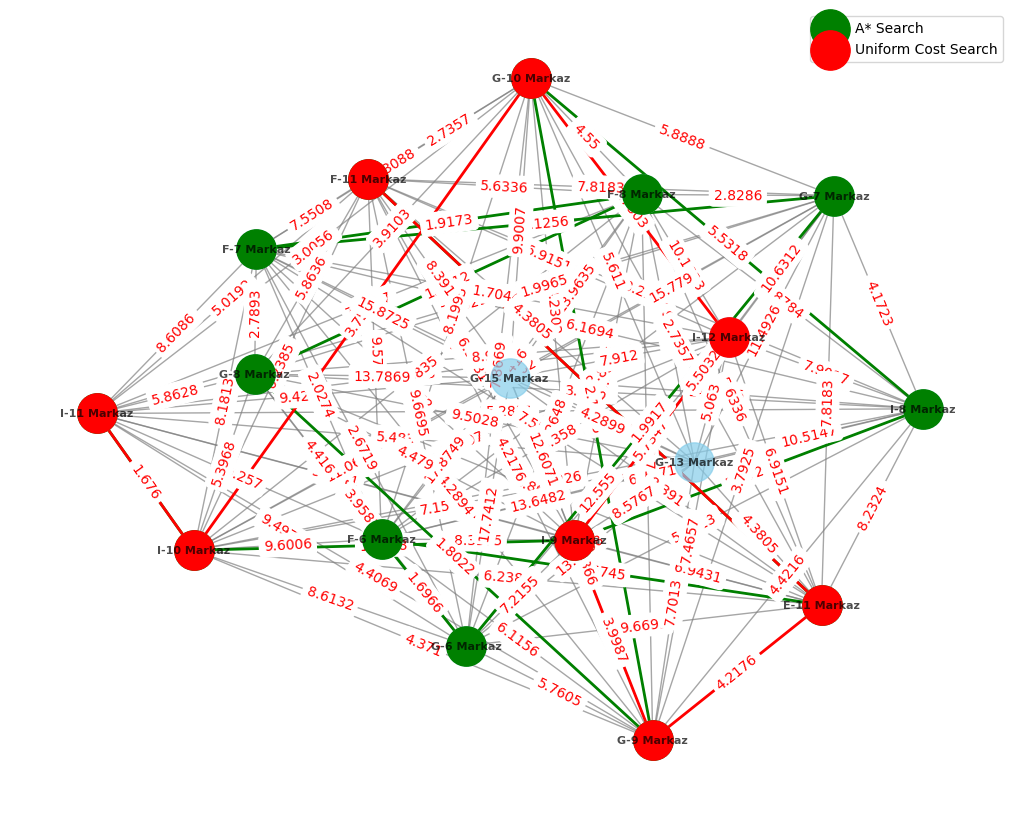

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Draw the graph
nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', font_weight='bold', node_size=800, node_color='skyblue', edge_color='gray', linewidths=1, alpha=0.7)

# Highlight A* Search path
nx.draw_networkx_nodes(G, pos, nodelist=astar_path, node_color='green', node_size=800, label='A* Search')
nx.draw_networkx_edges(G, pos, edgelist=list(zip(astar_path, astar_path[1:])), edge_color='green', width=2, label='_nolegend_')  # '_nolegend_' to exclude from legend

# Highlight Uniform Cost Search path
nx.draw_networkx_nodes(G, pos, nodelist=ucs_path, node_color='red', node_size=800, label='Uniform Cost Search')
nx.draw_networkx_edges(G, pos, edgelist=list(zip(ucs_path, ucs_path[1:])), edge_color='red', width=2, label='_nolegend_')  # '_nolegend_' to exclude from legend

# Display edge labels (distances)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show the legend
plt.legend()

# Show the plot
plt.show()


<h3>Conclusion</h3>
<p><b>When running both algorithms on the graph representing Markaz locations in Islamabad, I observed that A* search explored fewer nodes compared to Uniform Cost Search. The heuristic in A* efficiently guided the search towards the goal, resulting in a more optimized exploration process and faster convergence to the optimal path..</b></p>

# Problem 3

# Updating Transportation problem

In [15]:
class TransportationProblemNew(object):
    def __init__(self, N,weights):
        self.N = N
        self.weights=weights

    def startState(self):
        return 1

    def isEnd(self, state):
        return state == self.N

    def succAndCost(self, state):
        result = []
        if state + 1 <= self.N:
            result.append(('walk', state + 1, self.weights['walk']))
        if state + 3 <= self.N:
            result.append(('run', state + 3, self.weights['run']))
        if 2 * state <= self.N:
            result.append(('tram', 2 * state, self.weights['tram']))
        return result

<p><b>Here Transportation problem is updating where costs are defined as weights as passed as arguments.</b></p>

# Generating Training Examples

In [16]:
def predict(N,weights):
    problem=TransportationProblemNew(N,weights)
    totalCost,history=dynamicProgramming(problem)
    return [action for action, newState ,cost in history]
def generateExamples():
    trueWeights={'walk':1,'run':1.5,'tram':3}
    return [(N,predict(N,trueWeights)) for N in range (1,20)]
    


# Structured Perceptron

In [17]:
def structuredPerceptron(examples):
    weights={'walk':0,'run':0,'tram':0}
    for t in range(100):
        numMistakes=0
        for N, trueActions in examples:
            predActions=predict(N,weights)
            if predActions != trueActions:
                numMistakes+=1
            for action in trueActions:
                weights[action]-=1
            for action in predActions:
                weights[action]+=1
        print('Iteration {},numMistakes={}, weights={}'.format(t,numMistakes,weights))
        if numMistakes==0:
            break;
    

In [18]:
examples=generateExamples()
print("Dataset is:")
for example in examples:
    print(' ',example)

Dataset is:
  (1, [])
  (2, ['walk'])
  (3, ['walk', 'walk'])
  (4, ['run'])
  (5, ['run', 'walk'])
  (6, ['run', 'walk', 'walk'])
  (7, ['run', 'run'])
  (8, ['run', 'run', 'walk'])
  (9, ['run', 'run', 'walk', 'walk'])
  (10, ['run', 'run', 'run'])
  (11, ['run', 'run', 'run', 'walk'])
  (12, ['run', 'run', 'run', 'walk', 'walk'])
  (13, ['run', 'run', 'run', 'run'])
  (14, ['run', 'run', 'tram'])
  (15, ['run', 'run', 'tram', 'walk'])
  (16, ['run', 'run', 'walk', 'tram'])
  (17, ['run', 'run', 'tram', 'run'])
  (18, ['run', 'run', 'walk', 'walk', 'tram'])
  (19, ['run', 'run', 'walk', 'tram', 'run'])


In [19]:
structuredPerceptron(examples)

Iteration 0,numMistakes=8, weights={'walk': 0, 'run': 4, 'tram': 1}
Iteration 1,numMistakes=3, weights={'walk': 1, 'run': 2, 'tram': 4}
Iteration 2,numMistakes=0, weights={'walk': 1, 'run': 2, 'tram': 4}


<p><b>Here we see that after running our Structured perceptron we get costs close to true costs.</b></p>